pip install tensorflow-probability


Вероятность попадания за пределы красного круга: 0.7500


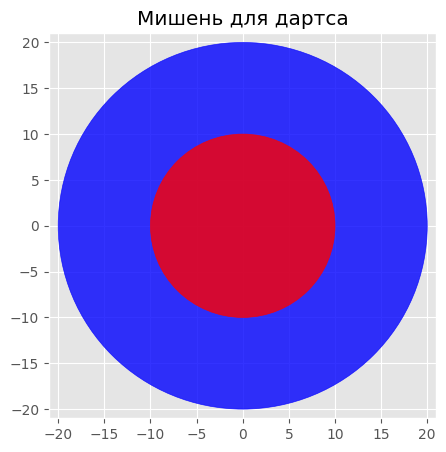

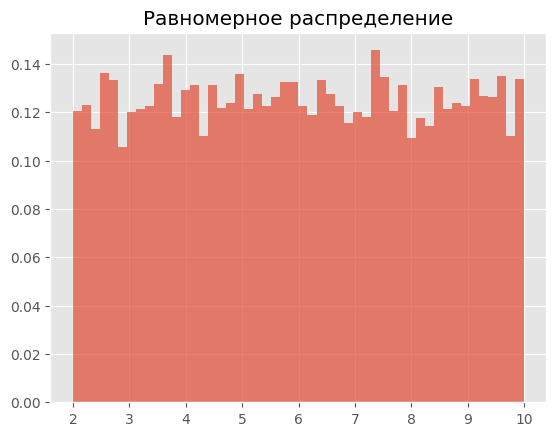

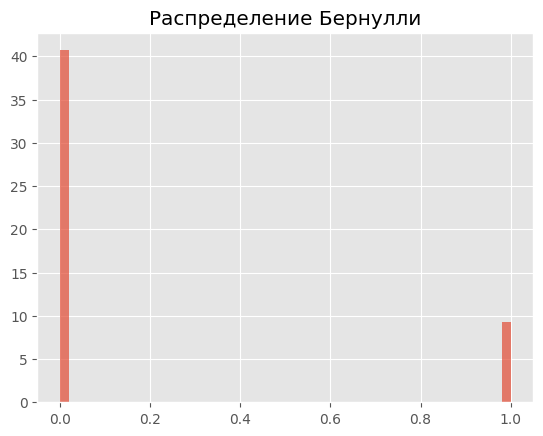

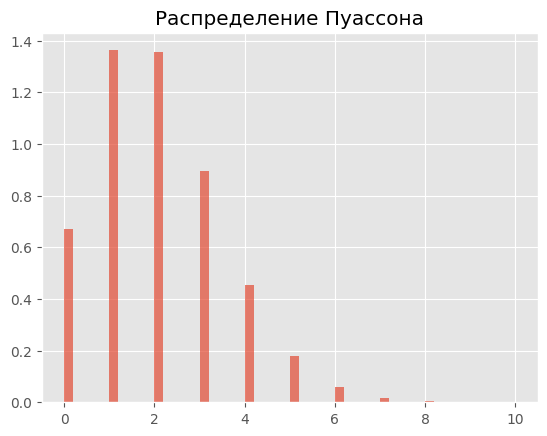

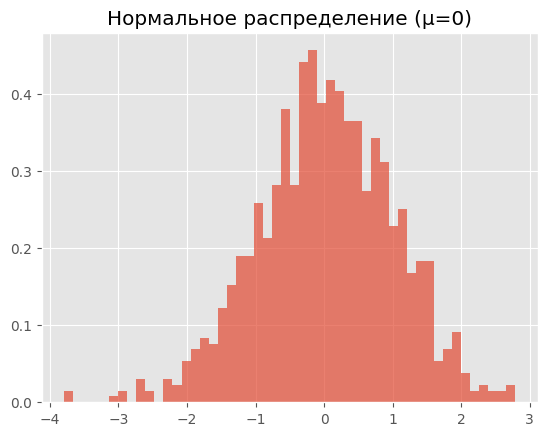

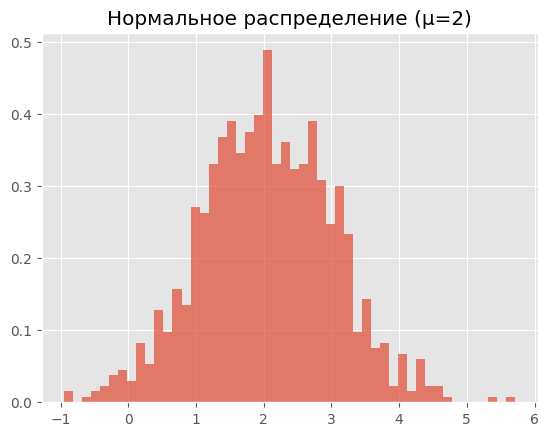

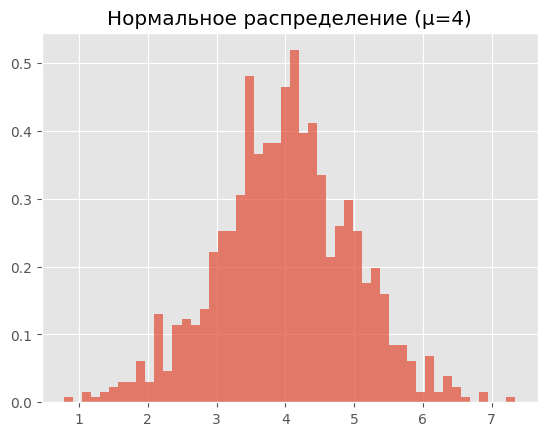

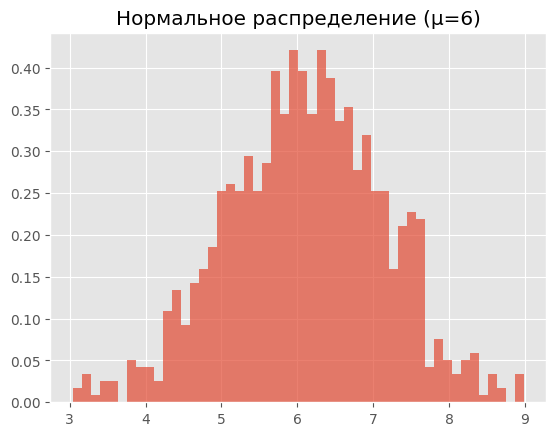

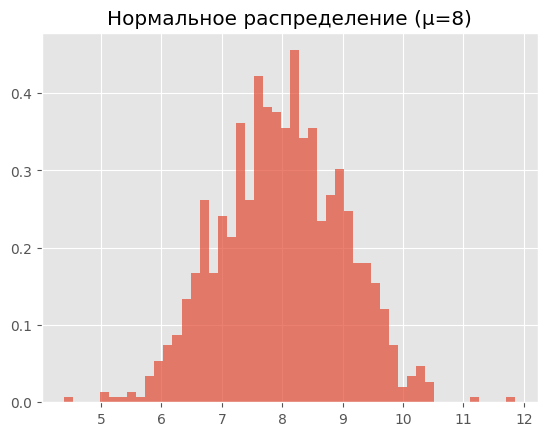

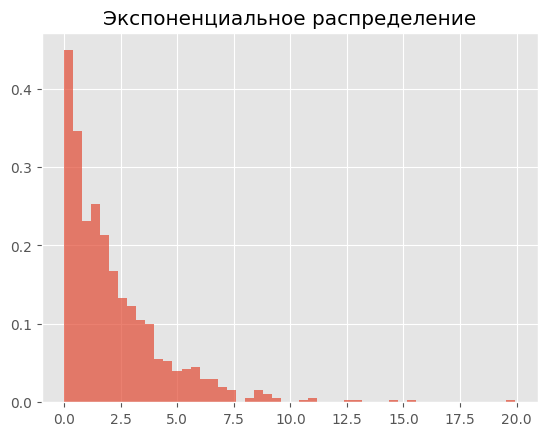

In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
plt.style.use('ggplot')  # Стиль оформления графиков

def darts(r_1=2, r_2=10):
    """
    Рисует мишень для дартса и вычисляет вероятность попадания
    r_1: радиус красного круга
    r_2: радиус синего круга
    """
    if r_2 < r_1:
        raise ValueError("Радиус r_2 должен быть больше r_1")
    
    # Создание фигуры и осей
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_xlim(-r_2-1, r_2+1)
    ax.set_ylim(-r_2-1, r_2+1)
    
    # Добавление кругов на график
    ax.add_patch(plt.Circle((0, 0), r_2, color='b', alpha=0.8))
    ax.add_patch(plt.Circle((0, 0), r_1, color='r', alpha=0.8))
    ax.set_title('Мишень для дартса')
    
    # Расчет и вывод вероятности
    вероятность = 1 - (r_1/r_2)**2
    print(f'Вероятность попадания за пределы красного круга: {вероятность:.4f}')
    plt.show()

darts(r_1=10, r_2=20)

def plot_distribution(dist_gen, название, n_points=1000, **kwargs):
    """
    Универсальная функция для построения распределений
    dist_gen: функция-генератор распределения
    название: заголовок графика
    n_points: количество точек для генерации
    **kwargs: параметры распределения
    """
    plt.figure()
    samples = dist_gen(n_points, **kwargs).numpy()
    plt.hist(samples, density=True, bins=50, alpha=0.7)
    plt.title(название)
    plt.show()

# Примеры использования:

# Равномерное распределение
plot_distribution(
    lambda n, a, b: tf.random.uniform((n,), minval=a, maxval=b),
    "Равномерное распределение",
    a=2, b=10, n_points=10000
)

# Распределение Бернулли
plot_distribution(
    lambda n, p: tfd.Bernoulli(probs=p).sample(n),
    "Распределение Бернулли",
    p=0.2
)

# Распределение Пуассона
plot_distribution(
    lambda n, lmb: tfd.Poisson(rate=lmb).sample(n),
    "Распределение Пуассона",
    lmb=2, n_points=50000
)

# Нормальное распределение с разными средними
for mu in range(0, 10, 2):
    plot_distribution(
        lambda n, m, s: tf.random.normal((n,), mean=m, stddev=s),
        f"Нормальное распределение (μ={mu})",
        m=mu, s=1
    )

# Экспоненциальное распределение
plot_distribution(
    lambda n, lmb: tfd.Exponential(rate=lmb).sample(n),
    "Экспоненциальное распределение",
    lmb=0.5
)

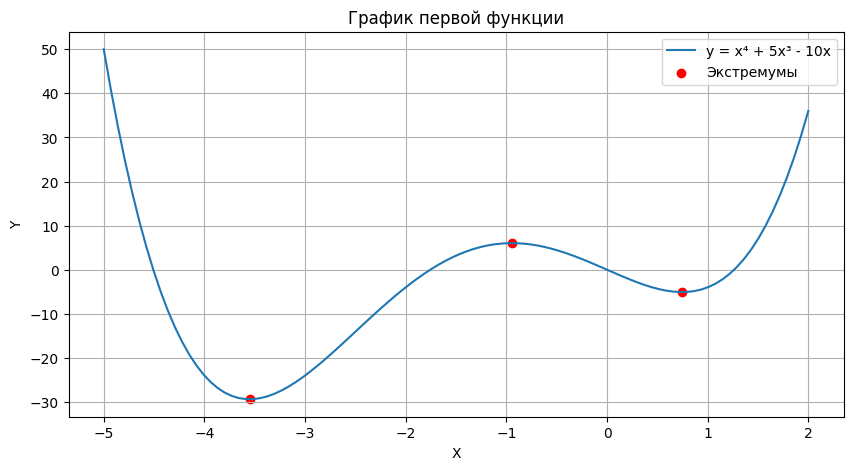

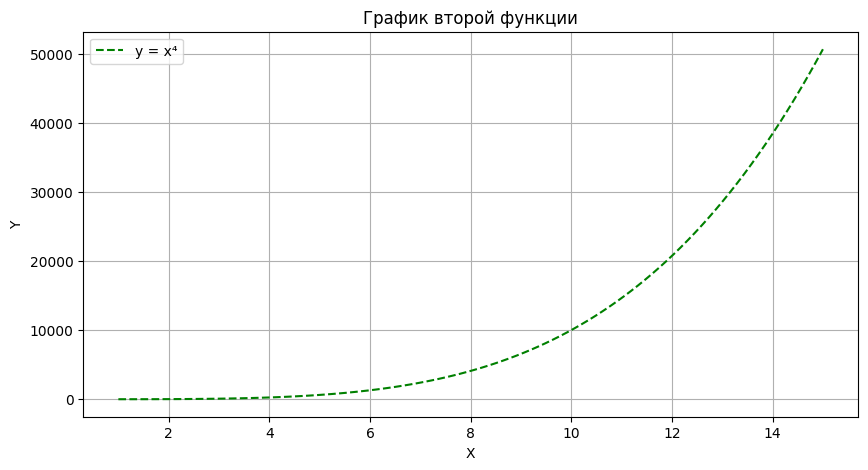

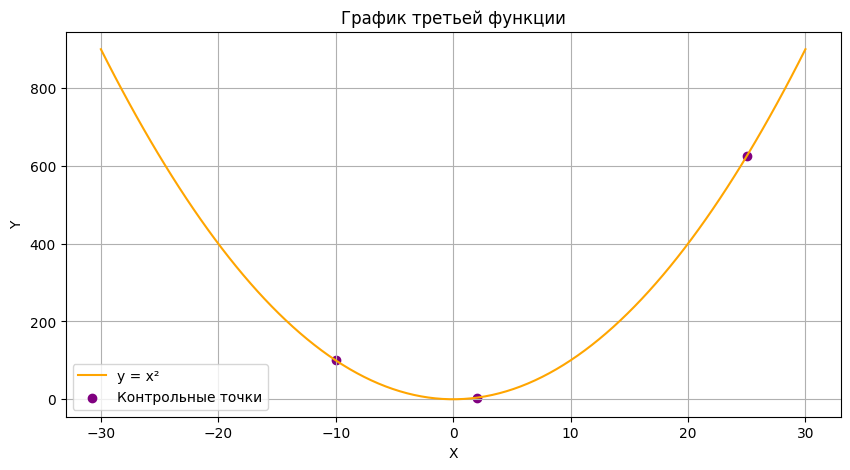

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Первая функция: F(x) = x⁴ + 5x³ - 10x
def F1(x):
    return x**4 + 5*x**3 - 10*x

# Создаем отдельное окно для первого графика
plt.figure("Функция 1", figsize=(10, 5))
x = np.linspace(-5, 2, 100)
y = F1(x)  # Векторизованные вычисления

plt.plot(x, y, label='y = x⁴ + 5x³ - 10x')
plt.scatter([-3.5518, -0.9439, 0.7457], 
            [F1(-3.5518), F1(-0.9439), F1(0.7457)],
            color='red', 
            label='Экстремумы')
plt.title('График первой функции')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()

# Вторая функция: F(x) = x⁴
def F2(x):
    return x**4

# Создаем новое окно для второго графика
plt.figure("Функция 2", figsize=(10, 5))
x = np.linspace(1, 15, 100)
y = F2(x)

plt.plot(x, y, 'g--', label='y = x⁴')
plt.title('График второй функции')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()

# Третья функция: F(x) = x²
def F3(x):
    return x**2

# Создаем новое окно для третьего графика
plt.figure("Функция 3", figsize=(10, 5))
x = np.linspace(-30, 30, 100)
y = F3(x)

plt.plot(x, y, 'orange', label='y = x²')
plt.scatter([-10, 2, 25], 
            [F3(-10), F3(2), F3(25)],
            color='purple',
            label='Контрольные точки')
plt.title('График третьей функции')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()

# Показать все графики
plt.show()

Оптимизация

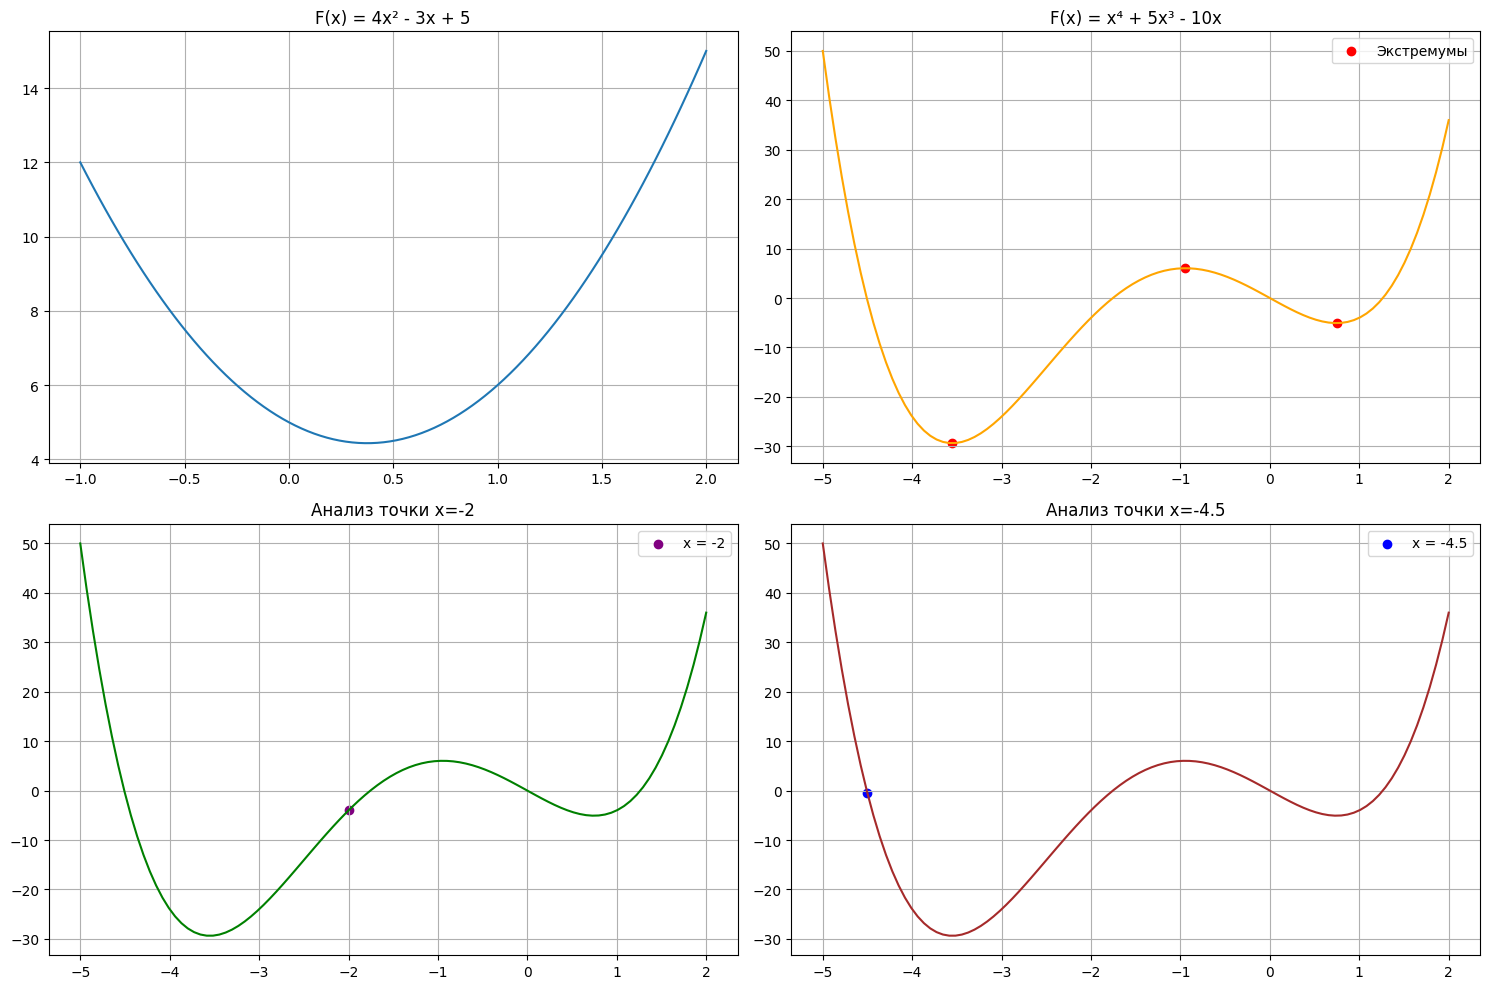

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Первая функция: F1(x) = 4x² - 3x + 5
def F1(x):
    return 4*x**2 - 3*x + 5

# Вторая функция: F2(x) = x⁴ + 5x³ - 10x
def F2(x):
    return x**4 + 5*x**3 - 10*x

# Третья функция (анализ точек): F3(x) = x⁴ + 5x³ - 10x
def F3(x):
    return x**4 + 5*x**3 - 10*x

# Четвертая функция (дополнительный анализ): F4(x) = x⁴ + 5x³ - 10x
def F4(x):
    return x**4 + 5*x**3 - 10*x

# Создаем 4 отдельных графика
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# График 1: F1(x)
x = np.linspace(-1, 2, 100)
axs[0,0].plot(x, F1(x), )
axs[0,0].set_title('F(x) = 4x² - 3x + 5')
axs[0,0].grid(True)

# График 2: F2(x) с экстремумами
x = np.linspace(-5, 2, 100)
axs[0,1].plot(x, F2(x), 'orange')
axs[0,1].scatter([-3.5518, -0.9439, 0.7457], 
               [F2(-3.5518), F2(-0.9439), F2(0.7457)],
               color='red', 
               label='Экстремумы')
axs[0,1].set_title('F(x) = x⁴ + 5x³ - 10x')
axs[0,1].legend()
axs[0,1].grid(True)

# График 3: F3(x) с точкой при x=-2
x = np.linspace(-5, 2, 100)
axs[1,0].plot(x, F3(x), 'green')
axs[1,0].scatter([-2], [F3(-2)], color='purple', label='x = -2')
axs[1,0].set_title('Анализ точки x=-2')
axs[1,0].legend()
axs[1,0].grid(True)

# График 4: F4(x) с точкой при x=-4.5
x = np.linspace(-5, 2, 100)
axs[1,1].plot(x, F4(x), 'brown')
axs[1,1].scatter([-4.5], [F4(-4.5)], color='blue', label='x = -4.5')
axs[1,1].set_title('Анализ точки x=-4.5')
axs[1,1].legend()
axs[1,1].grid(True)

# Общие настройки
plt.tight_layout()
plt.show()

Ну ради прикола решил градиентный спуск сделать. Получилось так. убил 2 часа 

Минимум в точке: [4.28174308e-05 5.70899077e-05]


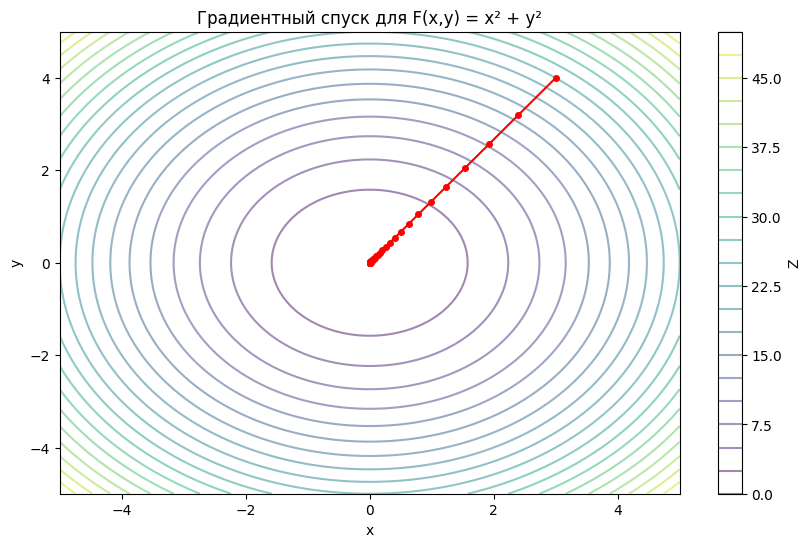

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Инициализация параметров
x = np.array([3.0, 4.0])  # Начальная точка (преобразуем в numpy array)
epsilon = 0.1
max_steps = 50
path = [x.copy()]  # Сохраняем начальную точку

# Градиентный спуск
for _ in range(max_steps):
    # Вычисление градиента
    grad = np.array([2*x[0], 2*x[1]])  # ▽F = (2x, 2y)
    
    # Обновление координат
    x = x - epsilon * grad
    path.append(x.copy())  # Сохраняем текущее положение
    
    # Проверка сходимости
    if np.linalg.norm(grad) < 1e-6:
        break

print(f"Минимум в точке: {x}")

# Создание сетки для визуализации
x_grid = np.linspace(-5, 5, 100)
y_grid = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = X**2 + Y**2

# Преобразуем траекторию в numpy array
path = np.array(path)

# Визуализация
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=20, alpha=0.5)
plt.plot(path[:, 0], path[:, 1], 'ro-', markersize=4)
plt.title('Градиентный спуск для F(x,y) = x² + y²')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Z')
plt.show()

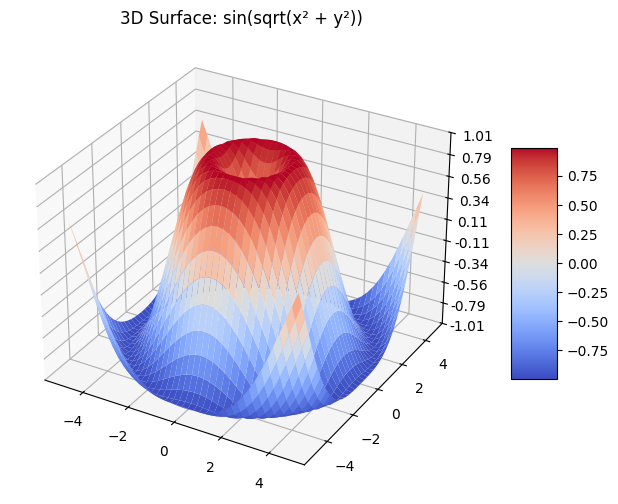

Ellipsis

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm  
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# 1. 3D график поверхности
fig3d = plt.figure(figsize=(10, 6))
ax = fig3d.add_subplot(111, projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, 
                       cmap=cm.coolwarm,  
                       linewidth=0, 
                       antialiased=True)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig3d.colorbar(surf, shrink=0.5, aspect=5)
plt.title('3D Surface: sin(sqrt(x² + y²))')
plt.show()

# 2. 2D графики (остальной код без изменений)
... 